# **Predicting Next word**
## *Using NLP & LSTM*

We see our keyboard suggesting related words when we're typing something on it. that is helpful sometimes, we don't have to type a long word by ourself. the keyboard automatically predict that using our past history and previous words. In this project we will try to build somthing similar of it by using NLP and LSTM. 
we are not going to explain NLP & LSTM concept in this project, Rather we are just gonna implement those techniques. 

## Importing libraries

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
import pickle
from tensorflow.keras.optimizers import RMSprop

## Upload the Dataset.
here we are using [the jungle book](https://www.gutenberg.org/ebooks/236) by Rudyard Kipling as a dataset

In [ ]:
from google.colab import files
data = files.upload()

Saving jungle book.txt to jungle book.txt


## Storing it into a list

In [ ]:
file = open("jungle book.txt", "r", encoding = "utf8")
lines = []
for i in  file:
  lines.append(i)

In [ ]:
text = ""
for i in lines:
  text = ' '.join(lines)

## Remove punctuations

In [ ]:
text = text.replace('\n', ' ').replace('\r', ' ').replace('\ufeff', ' ').replace('"', '').replace('"', '')
text = text.split()
text = ' '.join(text)
text[200:500]

're-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: The Jungle Book Author: Rudyard Kipling Release Date: January 16, 2006 [EBook #236] Last Updated: October 6, 2016 Language: English Character set encoding: UTF-8 *** START OF THI'

## Tokenization

In [ ]:
tokenizer = RegexpTokenizer('\s+', gaps = True)
words = tokenizer.tokenize(text)

## Finding unique words in the dataset
## and assign each of them with a index

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

## Building the corpus
In this project we will be predicting the next word with the help of five previous words. the next word will only depend the five words preceded by it. 

In [ ]:
length_word = 5
next_words = []
prev_words = []
for j in range(len(words) - length_word):
  prev_words.append(words[j:j+length_word])
  next_words.append(words[j + length_word])

print(prev_words[100])
print(next_words[100])

['JUNGLE', 'BOOK', 'By', 'Rudyard', 'Kipling']
Contents


## building Independent variables and dependent variabls.

In [ ]:
X = np.zeros((len(prev_words), length_word, len(unique_words)), dtype = bool)
y = np.zeros((len(next_words), len(unique_words)), dtype = bool)
for i, each_words in enumerate(prev_words):
  for j , each_word in enumerate(each_words):
    X[i, j, unique_word_index[each_word]] = 1
  y[i, unique_word_index[next_words[i]]] = 1

## building The model
we are using LSTM layers 

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(length_word, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

## compile and training

In [ ]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,  batch_size=128, epochs=30).history

Epoch 1/30
421/421 [==============================] - 13s 16ms/step - loss: 6.9531 - accuracy: 0.0911
Epoch 2/30
421/421 [==============================] - 6s 15ms/step - loss: 6.2880 - accuracy: 0.1402
Epoch 3/30
421/421 [==============================] - 6s 15ms/step - loss: 6.1577 - accuracy: 0.1778
Epoch 4/30
421/421 [==============================] - 7s 16ms/step - loss: 5.9757 - accuracy: 0.2312
Epoch 5/30
421/421 [==============================] - 7s 16ms/step - loss: 5.6725 - accuracy: 0.2940
Epoch 6/30
421/421 [==============================] - 7s 16ms/step - loss: 5.3552 - accuracy: 0.3595
Epoch 7/30
421/421 [==============================] - 7s 16ms/step - loss: 5.0538 - accuracy: 0.4167
Epoch 8/30
421/421 [==============================] - 7s 16ms/step - loss: 4.8060 - accuracy: 0.4619
Epoch 9/30
421/421 [==============================] - 6s 15ms/step - loss: 4.6085 - accuracy: 0.4967
Epoch 10/30
421/421 [==============================] - 6s 15ms/step - loss: 4.4637 - accur

## Saving the model

In [ ]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

## Visualize the model performance

Text(0.5, 0, 'epoch')

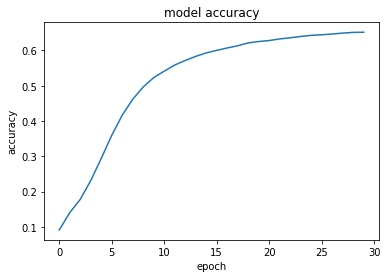

In [ ]:
plt.plot(history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

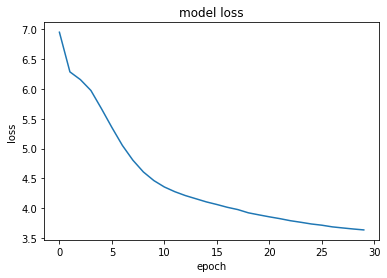

In [ ]:
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


## Prediction 
now we will do the prediction using our trained model. 
but first we have to preprocess our input text before feeding it to our model.

In [ ]:
def prepare_input(text):
  #text = text.lower().split()
  x = np.zeros((1, 5, len(unique_words)), dtype = bool)
  for t, char in enumerate(text):
    x[0, t, unique_word_index[char]] = 1
  return x

In [ ]:
def sample(preds, top_n=3):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds)
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def get_word(index):
  for i, j in unique_word_index.items():
    if j == index:
      return i
      break

In [ ]:
def predict_completions(text, n=3):

  x = prepare_input(text)

  preds = model.predict(x, verbose=0)[0]

  next_indices = sample(preds, n)

  return [get_word(idx) for idx in next_indices]

In [ ]:
quotes = [
    "He was going to spring down hill when a little shadow with a bushy tail crossed the threshold and whined",
    "And good luck and strong white teeth go with noblechildren that they may never forget the hungry in this world",
    "We call it hydrophobia, but they call it dewanee--the madness--and run",
    "He landed close to old Sea Vitch",
    "he had seen enough of it. So he called out"
]

In [ ]:
for q in quotes:
    seq = q.lower().split()[:5]
    texts = ' '.join(seq)
    print(texts)
    print("And the suggesting words are")
    print(predict_completions(seq, 5))
    print()

he was going to spring
And the suggesting words are
['down', 'in', 'over', 'he', 'Sea']

and good luck and strong
And the suggesting words are
['white', 'young', 'all', 'enough', 'a']

we call it hydrophobia, but
And the suggesting words are
['they', 'we', 'Rikki-tikki', 'it', 'he']

he landed close to old
And the suggesting words are
['Sea', 'all', 'the', 'mule.', 'will']

he had seen enough of
And the suggesting words are
['it.', 'the', 'elephants', 'something', 'only']



### we can confirm that everything is working fine. In each of the sentences we got the right suggestions.